# Web scraping house values

This is a very simple web scraping project. This was my first attempt at web scraping so I had to keep things simple. The idea was to scrape information about houses from etuovi.com, which is a house selling website. I used scrapy to do the scraping, the scrapy spider code is [here](https://github.com/pekkajauhi/python/blob/master/jkspider.py). I scraped the price, size, year, place, type and details of 50000 houses/apartments. In this notebook I did some simple stuff with the data for illustration purposes. Web scraping seems to be great way to get new datasets.

## Cleaning the data

In [176]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [230]:
df = pd.read_excel("/home/pekka/myfirstscraper/output4.xlsx")

In [231]:
df.head()

,details,place,price,size,type,year
0,<span>1h+kt</span>,Gerby Vaasa,89 500 €,"26,0 m²",Kerrostalo,"<div class=""year"">Vuosi<span>2020</span></div>"
1,<span>1h+kt</span>,Gerby Vaasa,89 500 €,"26,0 m²",Kerrostalo,"<div class=""year"">Vuosi<span>2020</span></div>"
2,<span>1h+kt</span>,Gerby Vaasa,89 500 €,"26,0 m²",Kerrostalo,"<div class=""year"">Vuosi<span>2020</span></div>"
3,<span>1h+kt</span>,Gerby Vaasa,89 500 €,"26,0 m²",Kerrostalo,"<div class=""year"">Vuosi<span>2020</span></div>"
4,<span>2h+k</span>,Gerby Vaasa,124 500 €,"43,0 m²",Kerrostalo,"<div class=""year"">Vuosi<span>2020</span></div>"


In [232]:
df['details'] = df['details'].str.replace('<span>', '')

In [233]:
df['details'] = df['details'].str.replace('</span>', '')

In [234]:
df['year'] = df['year'].str.replace('<div class="year">Vuosi<span>', '')

In [235]:
df['year'] = df['year'].str.replace('</span></div>', '')

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 6 columns):
details    50000 non-null object
place      50000 non-null object
price      50000 non-null object
size       50000 non-null object
type       50000 non-null object
year       50000 non-null object
dtypes: object(6)
memory usage: 2.7+ MB


In [237]:
df.describe()

,details,place,price,size,type,year
count,50000,50000,50000,50000,50000,50000
unique,20565,7240,8619,1524,7,183
top,2h+kt,Kivistö Vantaa,129 000 €,"80,0 m²",Kerrostalo,2019
freq,1839,546,460,757,28047,8738


In [238]:
df['price'] = df.price.str.replace('€','')

In [239]:
df.head()

,details,place,price,size,type,year
0,1h+kt,Gerby Vaasa,89 500,"26,0 m²",Kerrostalo,2020
1,1h+kt,Gerby Vaasa,89 500,"26,0 m²",Kerrostalo,2020
2,1h+kt,Gerby Vaasa,89 500,"26,0 m²",Kerrostalo,2020
3,1h+kt,Gerby Vaasa,89 500,"26,0 m²",Kerrostalo,2020
4,2h+k,Gerby Vaasa,124 500,"43,0 m²",Kerrostalo,2020


In [240]:
df['price'] = [x.rstrip() for x in df['price']]
df['price'] = df.price.str.replace(' ','')
df['price'] = df.price.str.replace(',','.')
df['price'] = df.price.str.replace('*','')
df['price'] = [float(x) for x in df['price']]

In [241]:
df['year'] = [int(x) for x in df['year']]

ValueError: invalid literal for int() with base 10: '<div class="year">Vuosi</div>'

In [242]:
df['year'].value_counts()

2019                             8738
2020                             5198
2018                             3025
<div class="year">Vuosi</div>    1909
1974                              943
1975                              871
1973                              821
1972                              781
1976                              672
1990                              668
1978                              665
2017                              641
1989                              634
2021                              628
1977                              593
1979                              586
1982                              577
1983                              572
1971                              558
1980                              552
1970                              536
2007                              526
1985                              525
1984                              525
1981                              518
2012                              518
2014        

In [243]:
df['year'] = df['year'].str.replace('<div class="year">Vuosi</div>', '0')

In [244]:
df['year'].value_counts()

2019    8738
2020    5198
2018    3025
0       1909
1974     943
1975     871
1973     821
1972     781
1976     672
1990     668
1978     665
2017     641
1989     634
2021     628
1977     593
1979     586
1982     577
1983     572
1971     558
1980     552
1970     536
2007     526
1985     525
1984     525
1981     518
2012     518
2014     507
2006     505
2013     487
2016     476
        ... 
1838       2
1888       1
1600       1
1799       1
1849       1
1882       1
1858       1
1812       1
1875       1
1842       1
1852       1
1883       1
1680       1
1806       1
1804       1
1855       1
1803       1
1500       1
1877       1
1830       1
1867       1
1841       1
1795       1
1790       1
1868       1
1407       1
1863       1
1750       1
1820       1
1829       1
Name: year, Length: 183, dtype: int64

In [245]:
df['year'] = [int(x) for x in df['year']]

In [246]:
df['year'].mean()

1918.7364

In [247]:
import numpy as np
df['year'] = df['year'].replace(0, np.nan)

In [248]:
df['year'].isnull().sum()

1909

In [249]:
np.nanmean(df['year'])

1994.9017487679607

In [250]:
df['size'] = df['size'].str.replace('m²', '')
df['size'] = [x.rstrip() for x in df['size']]
df['size'] = df['size'].str.replace(',', '.')
df['size'] = df['size'].str.replace('-', '0')
df['size'] = [float(x) for x in df['size']]

In [251]:
df.head(10)

,details,place,price,size,type,year
0,1h+kt,Gerby Vaasa,89500.0,26.0,Kerrostalo,2020.0
1,1h+kt,Gerby Vaasa,89500.0,26.0,Kerrostalo,2020.0
2,1h+kt,Gerby Vaasa,89500.0,26.0,Kerrostalo,2020.0
3,1h+kt,Gerby Vaasa,89500.0,26.0,Kerrostalo,2020.0
4,2h+k,Gerby Vaasa,124500.0,43.0,Kerrostalo,2020.0
5,1h+kt,Gerby Vaasa,89500.0,26.0,Kerrostalo,2020.0
6,1h+kt,Gerby Vaasa,89500.0,26.0,Kerrostalo,2020.0
7,1h+kt,Gerby Vaasa,89500.0,26.0,Kerrostalo,2020.0
8,1h+kt,Gerby Vaasa,89500.0,26.0,Kerrostalo,2020.0
9,1h+kt,Gerby Vaasa,89500.0,26.0,Kerrostalo,2020.0


In [275]:
df.to_excel("house_prices.xlsx")

## Playing with the data

In [252]:
df.place.value_counts()[:20]

Kivistö Vantaa             546
Tapiola Espoo              461
Keskusta Kuopio            373
Toppilansalmi Oulu         337
Tikkurila Vantaa           333
Saunalahti Espoo           322
Keskusta Oulu              303
Kalasatama Helsinki        301
Pasila Helsinki            263
Ranta-Tampella Tampere     254
Saaristokaupunki Kuopio    247
Klaukkala Nurmijärvi       236
Jokela Tuusula             234
Keskusta Seinäjoki         214
Leppävaara Espoo           210
Santalahti Tampere         195
Keskusta Turku             185
Keskusta Joensuu           185
Kaivoksela Vantaa          181
Keskusta Kokkola           180
Name: place, dtype: int64

In [273]:
df.price.max()

6065616.0

In [274]:
df[df['price'] == df['price'].max()]

,details,place,price,size,type,year
7916,"Kaksioita yhteensä 40 kpl: 2h, kt, alk, s, kph, p",Ounasvaara Rovaniemi,6065616.0,1784.0,Kerrostalo,2018.0


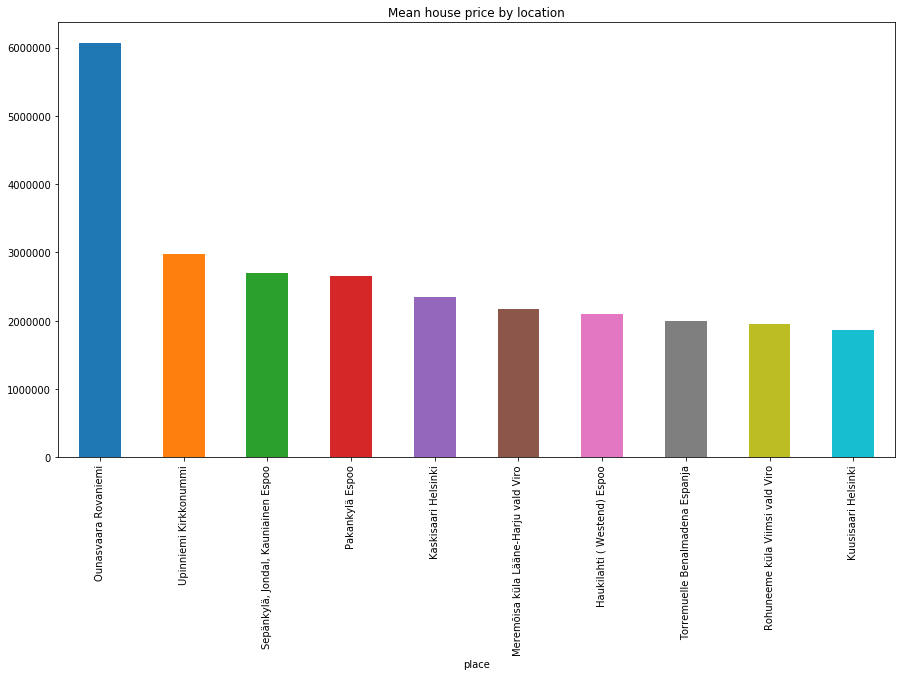

In [277]:
df.groupby('place')['price'].mean().sort_values(ascending=False)[:10].plot('bar', figsize=(15,8), title='Mean house price by location')
plt.show()



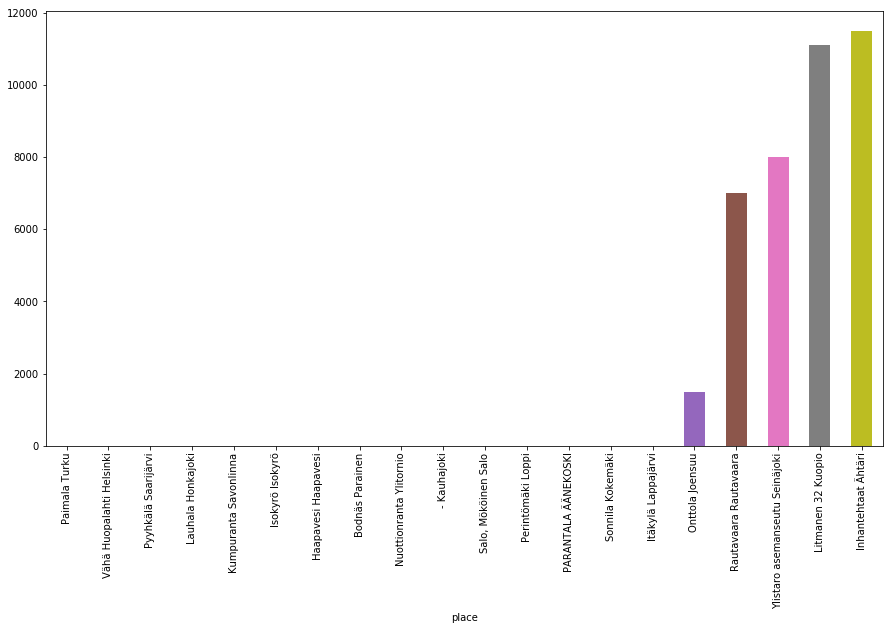

In [254]:
df.groupby('place')['price'].mean().sort_values(ascending=True)[:20].plot('bar', figsize=(15,8))
plt.show()

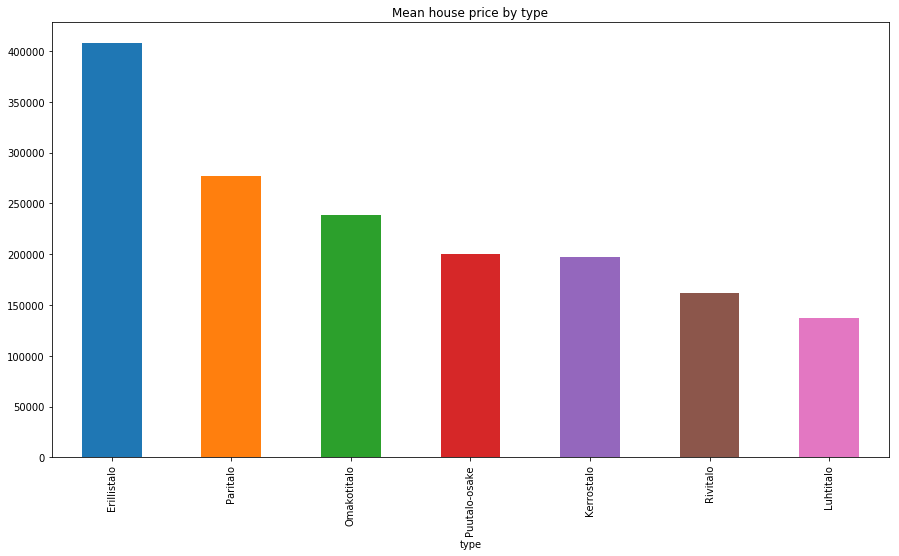

In [278]:
df.groupby('type')['price'].mean().sort_values(ascending=False).plot('bar', figsize=(15,8), title='Mean house price by type')
plt.show()

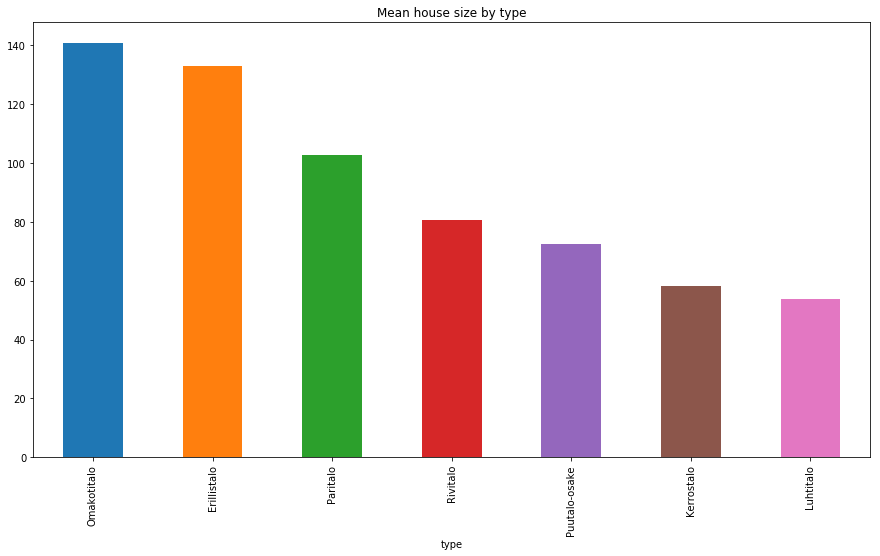

In [279]:
df.groupby('type')['size'].mean().sort_values(ascending=False).plot('bar', figsize=(15,8), title='Mean house size by type')
plt.show()

In [257]:
df.groupby('place')['year'].mean().sort_values(ascending=False)[:20]

place
Las Mesas Estepona Espanja          2021.000000
Vau da Rocha Portimão Portugali     2021.000000
keskusta Kirkkonummi                2021.000000
Verkkosaari, Kalasatama Helsinki    2020.800000
Kalasatama Helsinki                 2020.630000
Castillo Fuengirola Espanja         2020.333333
Santalahti Tampere                  2020.066667
esSence Guardamar Espanja           2020.000000
El Chaparral Mijas Costa Espanja    2020.000000
Vermonniitty Espoo                  2020.000000
Los Frutales Torrevieja Espanja     2020.000000
Keskusta, Hotkunranta Kuusamo       2020.000000
Tali Helsinki                       2020.000000
Mar Menor Mar Menor Espanja         2020.000000
Arola Turku                         2020.000000
Matkusniemi Kuopio                  2020.000000
Mijas Fuengirola Espanja            2020.000000
Pellaksenmäki Espoo                 2020.000000
Asemanseutu Kuopio                  2020.000000
Koivuhovi Kauniainen                2020.000000
Name: year, dtype: float64

In [258]:
df.groupby('place')['year'].mean().sort_values(ascending=True)[:20]

place
Vanalinn Tallinn Viro                 1543.500000
Dordogne Dordogne Ranska              1600.000000
Vanha kaupunki Porvoo                 1700.000000
Wanha Rauma Rauma                     1700.000000
Vanha Rauma Rauma                     1785.250000
Kaava-alueet Kaustinen                1795.000000
Nyby Siuntio                          1800.000000
Keskusta, Vanhakaupunki Savonlinna    1806.000000
Keskusta / Vanha Raahe Raahe          1810.000000
Ruotsinsalo Padasjoki                 1812.000000
Jokiranta Porvoo                      1816.666667
Neristan Kokkola                      1820.000000
Imavere küla Järva vald Viro          1829.000000
Vanhakaupunki Loviisa                 1830.000000
Tohmajärvi                            1841.000000
Sorola Kangasala                      1849.000000
Matalamaa Kokkola                     1850.000000
Vanhakartano Espoo                    1850.000000
Panttila Kurikka                      1858.000000
Fiskari Raasepori                     1860.0

In [259]:
df.groupby('type')['year'].mean().sort_values(ascending=False)

type
Luhtitalo        2007.364213
Erillistalo      2005.550864
Paritalo         2002.705912
Kerrostalo       1999.843787
Rivitalo         1993.533342
Omakotitalo      1980.291125
Puutalo-osake    1921.676768
Name: year, dtype: float64

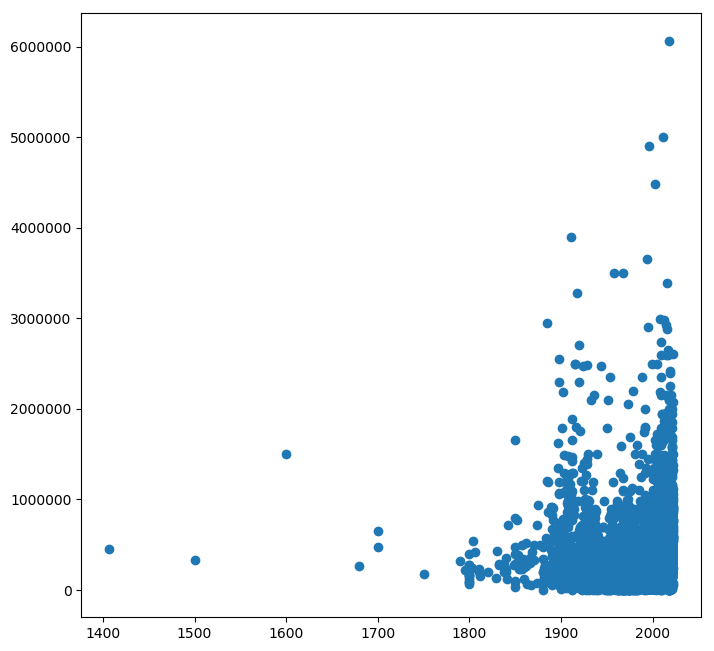

In [260]:
plt.figure(figsize=(8,8),dpi=100)
plt.scatter(x=df['year'], y=df['price'])

plt.show()

In [266]:
df.groupby(['type','place'])['size'].mean().sort_values(ascending=False)[:40]

type         place                          
Rivitalo     Kontiomäki Paltamo                 2083.000000
Kerrostalo   Ounasvaara Rovaniemi               1784.000000
Erillistalo  Teerijärvi Kruunupyy               1550.000000
Omakotitalo  Imavere küla Järva vald Viro       1445.000000
             Valga vald Viro                    1379.800000
Kerrostalo   Muurola Miehikkälä                 1310.000000
Rivitalo     Muuruvesi ja Säyneinen Kuopio      1189.000000
Omakotitalo  Kiviloo küla Raasiku vald Viro      999.200000
Kerrostalo   Santamäki Rovaniemi                 972.000000
             Radansuu Iitti                      958.000000
Omakotitalo  Keminmaa                            940.000000
Kerrostalo   Keskusta Salla                      926.000000
Erillistalo  Torppi Tornio                       903.000000
Kerrostalo   Mäntän keskusta Mänttä-Vilppula     902.000000
Omakotitalo  Pyynikki Tampere                    889.000000
             pirttikoski Pyhäjoki                888.00

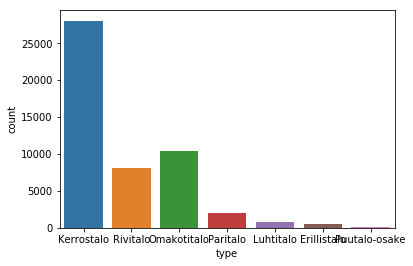

In [270]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(df['type'])
plt.show()